In [2]:
# MNIST Handwritten Digit Recognition in Keras
# PART I by using Multilayer Perceptron

# Setting up the Environment
# Install Anaconda3
# Install Keras, Tensorflow, Theano 
# Install Blas by using command,  conda install -c conda-forge blas
# Install graphviz by using the command, conda install -c conda-forge python-graphviz

# If you do not set your path in your OS, following path definition should be used for graphviz
import os
os.environ["PATH"] += os.pathsep +"C:\\Users\\Enespc\\Anaconda3\\Library\\bin\\graphviz"

# Import required packages for Keras, some of them are Keras-specific imports

from matplotlib import pyplot as plt
# Needed to show the plots inline
%matplotlib inline

import numpy as np # linear algebra
np.random.seed(2017)
 
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout, Input
from keras.models import Model
from keras.models import load_model
from keras.utils import np_utils
from keras.backend import image_dim_ordering

# from keras.utils.visualize_util import plot
from IPython.display import SVG
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import model_to_dot, plot_model
from importlib import reload

ModuleNotFoundError: No module named 'keras'

In [2]:
# Selection of Back end for Keras; Tensorflow or Theano
#from keras import backend as K

# Create custom exception, NotBackend
class NotBackend(Exception):
    def __str__(self):
        return "Your backend selection should be theano or tensorflow"
    
def set_keras_backend(backend):
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        #assert K.backend() == backend

while True:
# If the user backend selection is not theano or tensorflow then raise custom exception
    user_input = str(input('Please enter your backend (theano or tensorflow) :')) # user input
    try:
        if (user_input == "theano" or user_input == "tensorflow"):
            set_keras_backend(user_input)
            break
        else:
            raise NotBackend
    except NotBackend as nob:
        print (nob)
if user_input == "tensorflow" :
    K.set_image_dim_ordering('tf')
else:
    K.set_image_dim_ordering('th')
    
print ("Your backend is", user_input)
K.backend()
print (K.image_dim_ordering())

Please enter your backend (theano or tensorflow) :theano


Using Theano backend.


Your backend is theano
th


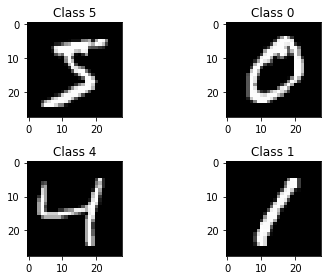

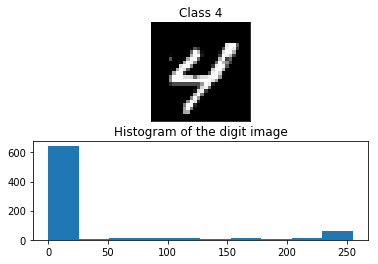

In [3]:
# Preparing the Dataset, MNIST
# MNIST dataset is loaded using following function
# The function splits the MNIST data into train and test sets

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Let's check MNIST dataset, digits and labels
# The MNIST dataset contains only grayscale images
digits_figure = plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title("Class {}".format(y_train[i]))
    #plt.xticks([])
    #plt.yticks([])
digits_figure
plt.savefig("digits.png", dpi=300) 

# the images of digits are 28*28 pixels
# Set class size, because there are only 10 digits, 0-9.
nb_classes = 10 # class size
# number of pixels in the image of digit, 28*28 
img_rows = 28
img_cols = 28
# Set input size of NN, number of pixels in the image of digit, 28*28 = 784
input_unit_size = 28*28 # flatten 28*28 images to a 784 vector for each image


# Find range of pixel values
# Calculate histogram of an image of a digit
one_digit_figure = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[89], cmap='gray', interpolation='none')
plt.title("Class {}".format(y_train[89]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[89].reshape(784))
plt.title("Histogram of the digit image")
plt.savefig("Histogram.png", dpi=300) 
# The pixel values range from 0 to 255.
# The background majority close to 0, and others close to 255 representing the digit.

In [1]:
# Store MNIST dataset into CVS files
# (X_train, y_train), (X_test, y_test)
# The format is: label, pix-11, pix-12, pix-13, ... where pix-ij is the pixel in the ith row and jth column
# Every column has one digit

# Create copy of reshaped dataset
X_train_cvs = X_train.reshape(X_train.shape[0], 784)
y_train_cvs = y_train.reshape(y_train.shape[0], 1)
X_test_cvs = X_test.reshape(X_test.shape[0], 784)
y_test_cvs = y_test.reshape(y_test.shape[0], 1)

# Create MNIST train dataset as a csv file
import csv
with open('mnist_train.csv', 'w', newline='') as fo:
    wo = csv.writer(fo)  
    for i in range(len(X_train_cvs)):
        line = np.append(y_train_cvs[i], X_train_cvs[i])
        line = line.tolist()
        wo.writerow(line)
        line = np.array(line) 
    fo.close()
    
# Create MNIST test dataset as a csv file
import csv
with open('mnist_test.csv', 'w', newline='') as fo:
    wo = csv.writer(fo)  
    for i in range(len(X_test_cvs)):
        line = np.append(y_test_cvs[i], X_test_cvs[i])
        line = line.tolist()
        wo.writerow(line)
        line = np.array(line) 
    fo.close() 

NameError: name 'X_train' is not defined

['9', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '14', '149', '193', '5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

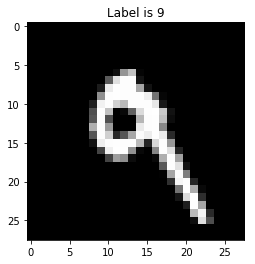

In [5]:
# Open and check cvs file, is everything well?
#  Find first digit 9 in the CVS file and plot it
import csv
with open('mnist_test.csv', 'r') as fo:
    alllines = csv.reader(fo, delimiter=',')
    lines_digit_nine = [lines for lines in alllines if lines[0] == '9']
    print (lines_digit_nine[0])
    lines = lines_digit_nine[0]
    # The first column is the label
    label = lines[0]
    # The rest of columns are pixels
    pixels = lines[1:]
    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = np.array(pixels, dtype='uint8')
    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))
    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [6]:
# Reshape train and test datas acoording to Tendorflow or Theano
# Theano ordering (channels, rows, cols)
# TensorFlow ordering (rows, cols, channels)
if K.image_dim_ordering() == 'th':
    input_shape = (1, img_rows, img_cols)  # Theano ordering (channels, rows, cols):
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1) # TensorFlow ordering (rows, cols, channels):
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [7]:
# Normalize the input data

# Print the shape before reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# Building the input vector from the 28x28 pixels, input_unit_size
X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_test  = X_test.reshape(X_test.shape[0], input_unit_size)
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# Mormalize the values by dividing 255, means foreground (black)
X_train /= 255
X_test  /= 255

# print the final input shape ready for training
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape (60000, 1, 28, 28)
y_train shape (60000,)
X_test shape (10000, 1, 28, 28)
y_test shape (10000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)
60000 train samples
10000 test samples


In [8]:
# Let's check desired output y, our categories
print(np.unique(y_train, return_counts=True))
# It still holds integer values from 0 to 9.
# Let's encode our categories - digits from 0 to 9 by using one-hot encoding
# The result is a vector with a length equal to the number of categories 
# The vector is all zeroes except in the position for the respective category
# Thus a '4' will be represented by [0,0,0,1,0,0,0,0,0]
print("The shape of desired output(categories) before one-hot encoding: ", y_train.shape)
# Reshape desired output, y
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("The shape of desired output(categories) after one-hot encoding: ", Y_train.shape)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949], dtype=int64))
The shape of desired output(categories) before one-hot encoding:  (60000,)
The shape of desired output(categories) after one-hot encoding:  (60000, 10)


In [9]:
# Create the Neural Network
# Building a linear stack of layers with the sequential model

number_of_neuron_in_the_hidden_layer = 512
model = Sequential()
model.add(Dense(number_of_neuron_in_the_hidden_layer, input_dim=input_unit_size, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))

# Compile the sequential model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

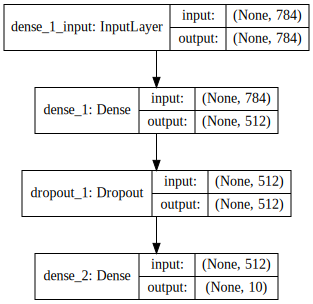

In [10]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# Training the Model
number_of_epoch = 20 #proposed 20
number_of_batch = 128

K.backend()
print (K.image_dim_ordering())
# train the model and dump all into train_history
train_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=number_of_epoch, batch_size=number_of_batch, verbose=2, validation_split=0.2)

# saving the model
# In order to work with the trained model and evaluate its performance the model is saved in the directory
save_dir = "C:\\Users\\Enespc\\Desktop\\HASAN\\python for programmer\\project"
if K.image_dim_ordering() == 'th':
    model_name = 'keras_mnist_theano_mlp.h5' 
else:
    model_name = 'keras_mnist_tensorflow_mlp.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

th
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
6s - loss: 0.2967 - acc: 0.9155 - val_loss: 0.1492 - val_acc: 0.9560
Epoch 2/20
6s - loss: 0.1237 - acc: 0.9638 - val_loss: 0.0911 - val_acc: 0.9734
Epoch 3/20
6s - loss: 0.0862 - acc: 0.9750 - val_loss: 0.0767 - val_acc: 0.9759
Epoch 4/20
6s - loss: 0.0640 - acc: 0.9810 - val_loss: 0.0708 - val_acc: 0.9782
Epoch 5/20
6s - loss: 0.0518 - acc: 0.9843 - val_loss: 0.0617 - val_acc: 0.9802
Epoch 6/20
6s - loss: 0.0417 - acc: 0.9868 - val_loss: 0.0662 - val_acc: 0.9796
Epoch 7/20
6s - loss: 0.0344 - acc: 0.9893 - val_loss: 0.0605 - val_acc: 0.9810
Epoch 8/20
6s - loss: 0.0283 - acc: 0.9915 - val_loss: 0.0574 - val_acc: 0.9818
Epoch 9/20
6s - loss: 0.0247 - acc: 0.9925 - val_loss: 0.0574 - val_acc: 0.9824
Epoch 10/20
6s - loss: 0.0216 - acc: 0.9935 - val_loss: 0.0594 - val_acc: 0.9822
Epoch 11/20
6s - loss: 0.0179 - acc: 0.9944 - val_loss: 0.0580 - val_acc: 0.9827
Epoch 12/20
6s - loss: 0.0155 - acc: 0.9951 - val_loss: 0.0595 - 

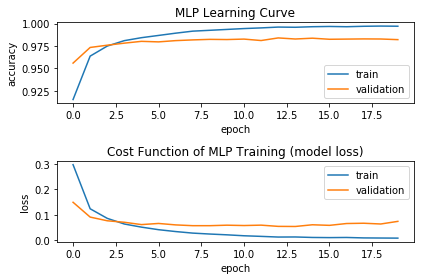

In [13]:
# plotting the learning curve
learning_curve = plt.figure()
plt.subplot(2,1,1)
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('MLP Learning Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Cost Function of MLP Training (model loss)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.savefig("Learning_Curve_Mlp.png", dpi=300) 

In [14]:
# Evaluate Performance of the Model 
# load model and obtain results
mnist_deep_nn__model = load_model(model_name)
performance = mnist_deep_nn__model.evaluate(X_test, Y_test, verbose=0)
# print scores
print("The Cost Function of test datas, Test Loss :", performance[0])
print("Test Accuracy: %.2f%%" % (performance[1]*100))
print("Test Error: %.2f%%" % (100-performance[1]*100))

The Cost Function of test datas, Test Loss : 0.0743614865128
Test Accuracy: 98.21%
Test Error: 1.79%


 8864/10000 [=========================>....] - ETA: 0s
9821 recognized correctly
179 recognized incorrectly


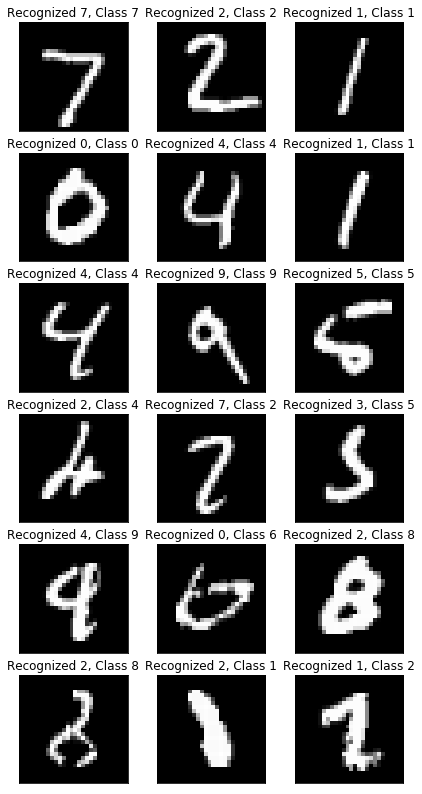

In [15]:
# Visualize recognized correctly and incorrectly sample of digits
# load the model and create predictions on the test set
mnist_deep_nn__model = load_model(model_name)
recognized_digits = mnist_deep_nn__model.predict_classes(X_test)

# Let's see which ones are recognized correctly and not
recognized_correct_indices = np.nonzero(recognized_digits == y_test)[0]
recognized_incorrect_indices = np.nonzero(recognized_digits != y_test)[0]
print()
print(len(recognized_correct_indices), "recognized correctly")
print(len(recognized_incorrect_indices), "recognized incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

recognition_digits_results_figure = plt.figure()

# plot first 9 correct predictions
for i, correct in enumerate(recognized_correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Recognized {}, Class {}".format(recognized_digits[correct], y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot first 9 incorrect predictions
for i, incorrect in enumerate(recognized_incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Recognized {}, Class {}".format(recognized_digits[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])
plt.savefig("mlp_recognition_digits_results_figure.png", dpi=300) 

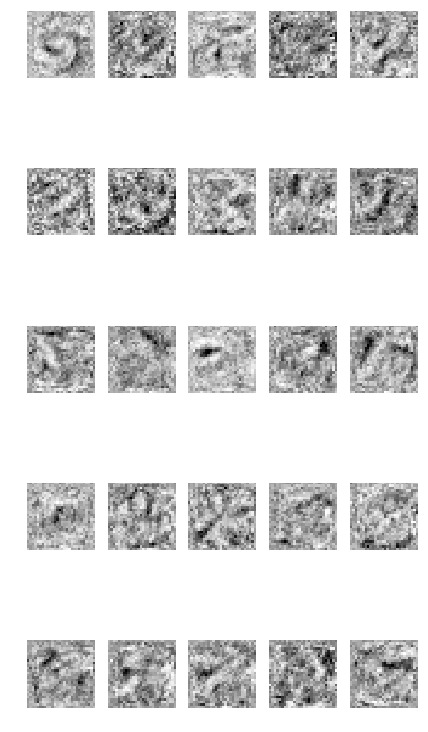

In [16]:
import matplotlib.pyplot as plt     
import matplotlib.cm as cm 
import numpy

weights = model.layers[0].get_weights()
fig = plt.figure()
  
w = weights[0].T          
for neuron in range(25):    # input_unit_size     
    ax = fig.add_subplot(5, 5, neuron+1) # 28, 28
    ax.axis("off")
    ax.imshow(numpy.reshape(w[neuron], (28, 28)), cmap = cm.Greys_r) # 28, 28
plt.savefig("mlp_neuron_images.png", dpi=300)    #300 dpi
plt.show()  

In [17]:
# MNIST Handwritten Digit Recognition in Keras
# PART II by using Deep Neural Network

# Import required packages for Keras, some of them are Keras-specific imports
from matplotlib import pyplot as plt
# Needed to show the plots inline
%matplotlib inline

import numpy as np # linear algebra
np.random.seed(2017)
 
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout, Input
from keras.models import Model
from keras.models import load_model
from keras.utils import np_utils
from keras.backend import image_dim_ordering

# from keras.utils.visualize_util import plot
from IPython.display import SVG
#from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import model_to_dot, plot_model
#set_keras_backend(user_input)

In [18]:
# Create the Neural Network
# Building a linear stack of layers with the sequential model

print (K.image_dim_ordering())
number_of_neuron_in_the_hidden_layer = 512
model = Sequential()
model.add(Dense(number_of_neuron_in_the_hidden_layer, input_dim=input_unit_size, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(number_of_neuron_in_the_hidden_layer, input_dim=input_unit_size, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, kernel_initializer='normal', activation='softmax'))

# Compile the sequential model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

th


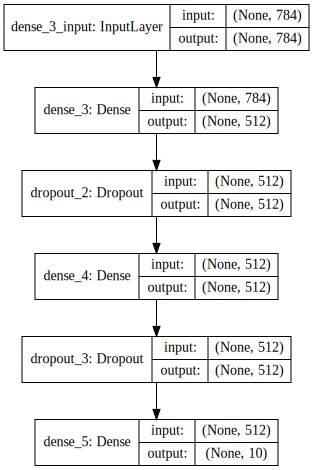

In [19]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [20]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# Training the Model
number_of_epoch = 20 #proposed 20
number_of_batch = 128

print (K.image_dim_ordering())
# train the model and dump all into train_history
train_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=number_of_epoch, batch_size=number_of_batch, verbose=2, validation_split=0.2)

# saving the model
# In order to work with the trained model and evaluate its performance the model is saved in the directory
save_dir = "C:\\Users\\Enespc\\Desktop\\HASAN\\python for programmer\\project"
if K.image_dim_ordering() == 'th':
    model_name = 'keras_mnist_theano_deep_nn.h5'
else:
    model_name = 'keras_mnist_tensorflow_deep_nn.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

th
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
10s - loss: 0.2543 - acc: 0.9236 - val_loss: 0.1223 - val_acc: 0.9628
Epoch 2/20
10s - loss: 0.1031 - acc: 0.9688 - val_loss: 0.0785 - val_acc: 0.9743
Epoch 3/20
10s - loss: 0.0710 - acc: 0.9775 - val_loss: 0.0742 - val_acc: 0.9759
Epoch 4/20
10s - loss: 0.0551 - acc: 0.9817 - val_loss: 0.0640 - val_acc: 0.9792
Epoch 5/20
10s - loss: 0.0446 - acc: 0.9850 - val_loss: 0.0604 - val_acc: 0.9806
Epoch 6/20
11s - loss: 0.0379 - acc: 0.9877 - val_loss: 0.0668 - val_acc: 0.9804
Epoch 7/20
11s - loss: 0.0317 - acc: 0.9894 - val_loss: 0.0651 - val_acc: 0.9821
Epoch 8/20
11s - loss: 0.0302 - acc: 0.9900 - val_loss: 0.0596 - val_acc: 0.9825
Epoch 9/20
11s - loss: 0.0277 - acc: 0.9913 - val_loss: 0.0612 - val_acc: 0.9816
Epoch 10/20
11s - loss: 0.0238 - acc: 0.9921 - val_loss: 0.0699 - val_acc: 0.9811
Epoch 11/20
11s - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0712 - val_acc: 0.9834
Epoch 12/20
11s - loss: 0.0199 - acc: 0.9929 - val_los

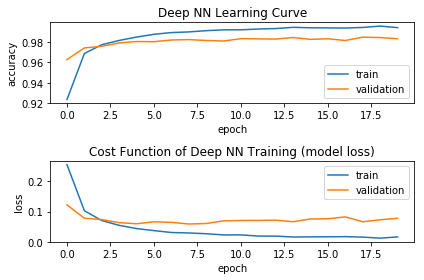

In [22]:
# plotting the learning curve
learning_curve = plt.figure()
plt.subplot(2,1,1)
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Deep NN Learning Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Cost Function of Deep NN Training (model loss)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.savefig("Learning_Curve_Depp_NN.png", dpi=300) 

In [23]:
# Evaluate Performance of the Model 
# load model and obtain results
mnist_deep_nn__model = load_model(model_name)
performance = mnist_deep_nn__model.evaluate(X_test, Y_test, verbose=0)
# print scores
print("The Cost Function of test datas, Test Loss :", performance[0])
print("Test Accuracy: %.2f%%" % (performance[1]*100))
print("Test Error: %.2f%%" % (100-performance[1]*100))

The Cost Function of test datas, Test Loss : 0.0782854418568
Test Accuracy: 98.33%
Test Error: 1.67%


 9920/10000 [============================>.] - ETA: 0s
9833 recognized correctly
167 recognized incorrectly


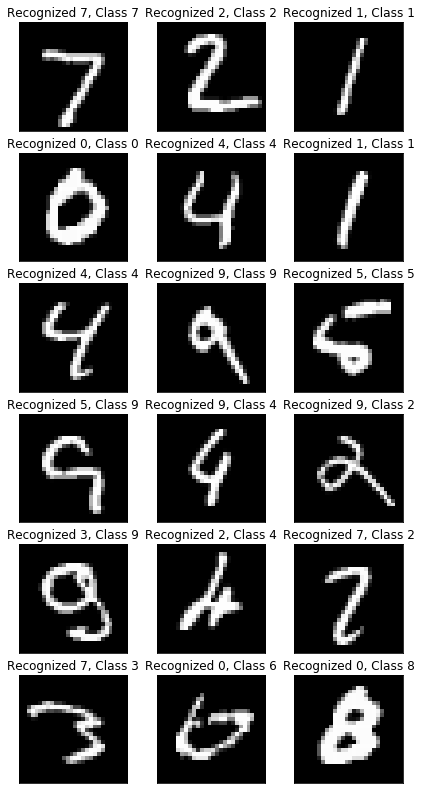

In [24]:
# Visualize recognized correctly and incorrectly sample of digits
# load the model and create predictions on the test set
mnist_deep_nn__model = load_model(model_name)
recognized_digits = mnist_deep_nn__model.predict_classes(X_test)

# Let's see which ones are recognized correctly and not
recognized_correct_indices = np.nonzero(recognized_digits == y_test)[0]
recognized_incorrect_indices = np.nonzero(recognized_digits != y_test)[0]
print()
print(len(recognized_correct_indices), "recognized correctly")
print(len(recognized_incorrect_indices), "recognized incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

recognition_digits_results_figure = plt.figure()

# plot first 9 correct predictions
for i, correct in enumerate(recognized_correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Recognized {}, Class {}".format(recognized_digits[correct], y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot first 9 incorrect predictions
for i, incorrect in enumerate(recognized_incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Recognized {}, Class {}".format(recognized_digits[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])
plt.savefig("deep_nn_recognition_digits_results_figure.png", dpi=300)

In [25]:
# MNIST Handwritten Digit Recognition in Keras
# PART III by using Convolutional Neural Network (CNN)
set_keras_backend("theano") # theano

In [26]:
# Import required packages for Keras, some of them are Keras-specific imports
import keras
keras.backend.backend()
keras.backend.image_dim_ordering()

# Ensure to set the image dimension appropriately
K = keras.backend.backend()
if K=='tensorflow':
    keras.backend.set_image_dim_ordering('tf')
else:
    keras.backend.set_image_dim_ordering('th')

In [27]:
# Import required packages for Keras, some of them are Keras-specific imports
from matplotlib import pyplot as plt
# Needed to show the plots inline
%matplotlib inline

import numpy as np
np.random.seed(2017)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.preprocessing import sequence
from keras.backend import image_dim_ordering
from keras.models import load_model

from keras import backend as K
from keras.utils.vis_utils import plot_model
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot, plot_model

In [28]:
# Reshape train and test datas acoording to Tendorflow or Theano
# the images of digits are 28*28 pixels
# Set class size, because there are only 10 digits, 0-9.
nb_classes = 10 # class size
# number of pixels in the image of digit, 28*28 
img_rows, img_cols = 28, 28
# Set input size of NN, number of pixels in the image of digit, 28*28 = 784
input_unit_size = 28*28 # flatten 28*28 images to a 784 vector for each image
# Theano ordering (channels, rows, cols)
# TensorFlow ordering (rows, cols, channels)
if K.image_dim_ordering() == 'th':
    input_shape = (1, img_rows, img_cols)  # Theano ordering (channels, rows, cols):
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1) # TensorFlow ordering (rows, cols, channels):
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [29]:
# Let's check desired output y, our categories
print(np.unique(y_train, return_counts=True))
# It still holds integer values from 0 to 9.
# Let's encode our categories - digits from 0 to 9 by using one-hot encoding
# The result is a vector with a length equal to the number of categories 
# The vector is all zeroes except in the position for the respective category
# Thus a '4' will be represented by [0,0,0,1,0,0,0,0,0]
print("The shape of desired output(categories) before one-hot encoding: ", y_train.shape)
# Reshape desired output, y
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("The shape of desired output(categories) after one-hot encoding: ", Y_train.shape)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949], dtype=int64))
The shape of desired output(categories) before one-hot encoding:  (60000,)
The shape of desired output(categories) after one-hot encoding:  (60000, 10)


In [30]:
# Create Convolution Neural Network (CNN)
# Building a linear stack of layers with the sequential model
# define parameters of CNN
nb_filters_01 = 32 # the number of filters for first convolution layer
nb_filters_02 = 64 # the number of filters for second convolution layer
nb_pool = 2 # window size of pooling
nb_conv = 3 # window or kernel size of filter

# define two groups of layers: feature (convolutions) and classification (dense)
first_stage_feature_layers = [
    Conv2D (nb_filters_01, (nb_conv, nb_conv), input_shape=input_shape), Activation('relu'),
    Conv2D (nb_filters_02, (nb_conv, nb_conv)), Activation('relu'),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)), Dropout(0.25),
    Flatten(),
]
second_stage_classification_layers = [
    Dense(128), Activation('relu'), Dropout(0.5),
    Dense(nb_classes), Activation('softmax')
]

# create complete model
model = Sequential(first_stage_feature_layers + second_stage_classification_layers)
# Compile the sequential model
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

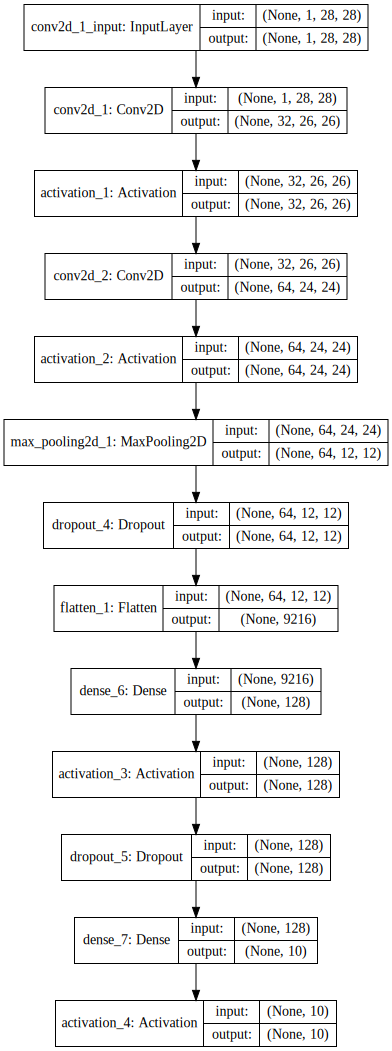

In [31]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [32]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 26, 26)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 24, 24)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 24, 24)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
__________

In [33]:
# Train the Model
number_of_epoch = 20 #proposed 20
number_of_batch = 128

# train the model and dump all into train_history
train_history = model.fit(X_train, Y_train, epochs=number_of_epoch, batch_size=number_of_batch, verbose=2,  validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
171s - loss: 0.3923 - acc: 0.8810 - val_loss: 0.1033 - val_acc: 0.9703
Epoch 2/20
171s - loss: 0.1334 - acc: 0.9615 - val_loss: 0.0676 - val_acc: 0.9803
Epoch 3/20
172s - loss: 0.0992 - acc: 0.9701 - val_loss: 0.0561 - val_acc: 0.9838
Epoch 4/20
168s - loss: 0.0811 - acc: 0.9759 - val_loss: 0.0509 - val_acc: 0.9856
Epoch 5/20
169s - loss: 0.0729 - acc: 0.9780 - val_loss: 0.0502 - val_acc: 0.9848
Epoch 6/20
173s - loss: 0.0641 - acc: 0.9809 - val_loss: 0.0482 - val_acc: 0.9856
Epoch 7/20
171s - loss: 0.0597 - acc: 0.9822 - val_loss: 0.0430 - val_acc: 0.9881
Epoch 8/20
173s - loss: 0.0530 - acc: 0.9842 - val_loss: 0.0453 - val_acc: 0.9874
Epoch 9/20
167s - loss: 0.0472 - acc: 0.9848 - val_loss: 0.0425 - val_acc: 0.9875
Epoch 10/20
166s - loss: 0.0456 - acc: 0.9864 - val_loss: 0.0404 - val_acc: 0.9885
Epoch 11/20
167s - loss: 0.0432 - acc: 0.9868 - val_loss: 0.0388 - val_acc: 0.9888
Epoch 12/20
166s - loss: 0.0396 - acc: 0.9882 

In [34]:
# saving the model
# In order to work with the trained model and evaluate its performance the model is saved in the directory
save_dir = "C:\\Users\\Enespc\\Desktop\\HASAN\\python for programmer\\project"
model_name = 'keras_mnist_theano_cnn.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\Enespc\Desktop\HASAN\python for programmer\project\keras_mnist_theano_cnn.h5 


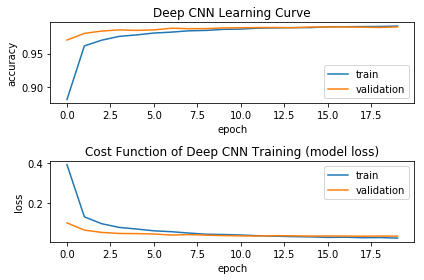

In [35]:
# plotting the learning curve
learning_curve = plt.figure()
plt.subplot(2,1,1)
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Deep CNN Learning Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Cost Function of Deep CNN Training (model loss)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()
plt.savefig("Learning_curve_mnist_theano_cnn.png", dpi=300) 

In [36]:
# Evaluate Performance of the Model 
# load model and obtain results
mnist_deep_cnn__model = load_model(model_name)
performance = mnist_deep_cnn__model.evaluate(X_test, Y_test, verbose=0)
# print scores
print("The Cost Function of test datas, Test Loss :", performance[0])
print("Test Accuracy: %.2f%%" % (performance[1]*100))
print("Test Error: %.2f%%" % (100-performance[1]*100))

The Cost Function of test datas, Test Loss : 0.0273965097041
Test Accuracy: 99.11%
Test Error: 0.89%


10000/10000 [==============================] - 12s    

9911 recognized correctly
89 recognized incorrectly


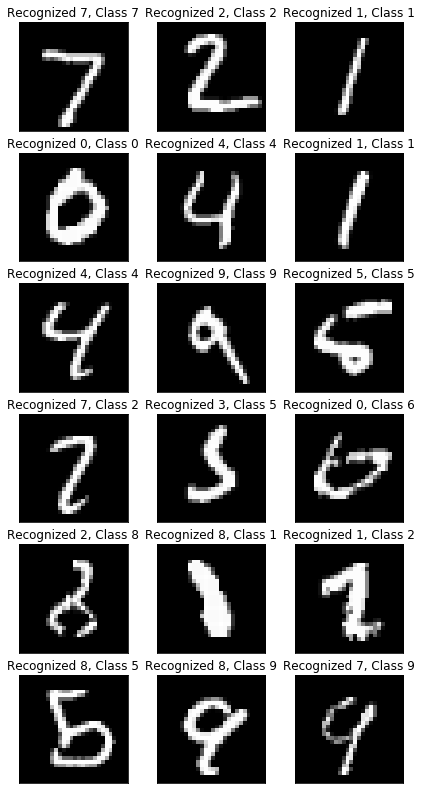

In [37]:
# Visualize recognized correctly and incorrectly sample of digits
# load the model and create predictions on the test set
mnist_deep_nn__model = load_model(model_name)
recognized_digits = mnist_deep_nn__model.predict_classes(X_test)

# Let's see which ones are recognized correctly and not
recognized_correct_indices = np.nonzero(recognized_digits == y_test)[0]
recognized_incorrect_indices = np.nonzero(recognized_digits != y_test)[0]
print()
print(len(recognized_correct_indices), "recognized correctly")
print(len(recognized_incorrect_indices), "recognized incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

recognition_digits_results_figure = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(recognized_correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Recognized {}, Class {}".format(recognized_digits[correct], y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(recognized_incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Recognized {}, Class {}".format(recognized_digits[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])
plt.savefig("deep_cnn_recognition_digits_results_figure.png", dpi=300) 

In [38]:
# visualization of layers
if K.image_dim_ordering() == 'th':
    input_shape = (1, img_rows, img_cols)  # Theano ordering (channels, rows, cols):
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1) # TensorFlow ordering (rows, cols, channels):
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis('off')

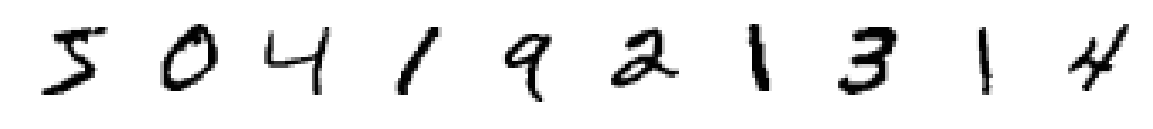

In [39]:
# visualization of Input Layer, Original Image
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.savefig("deep_cnn_input_layer_images.png", dpi=300)
plt.show()

first layer shape:  (10, 32, 26, 26)


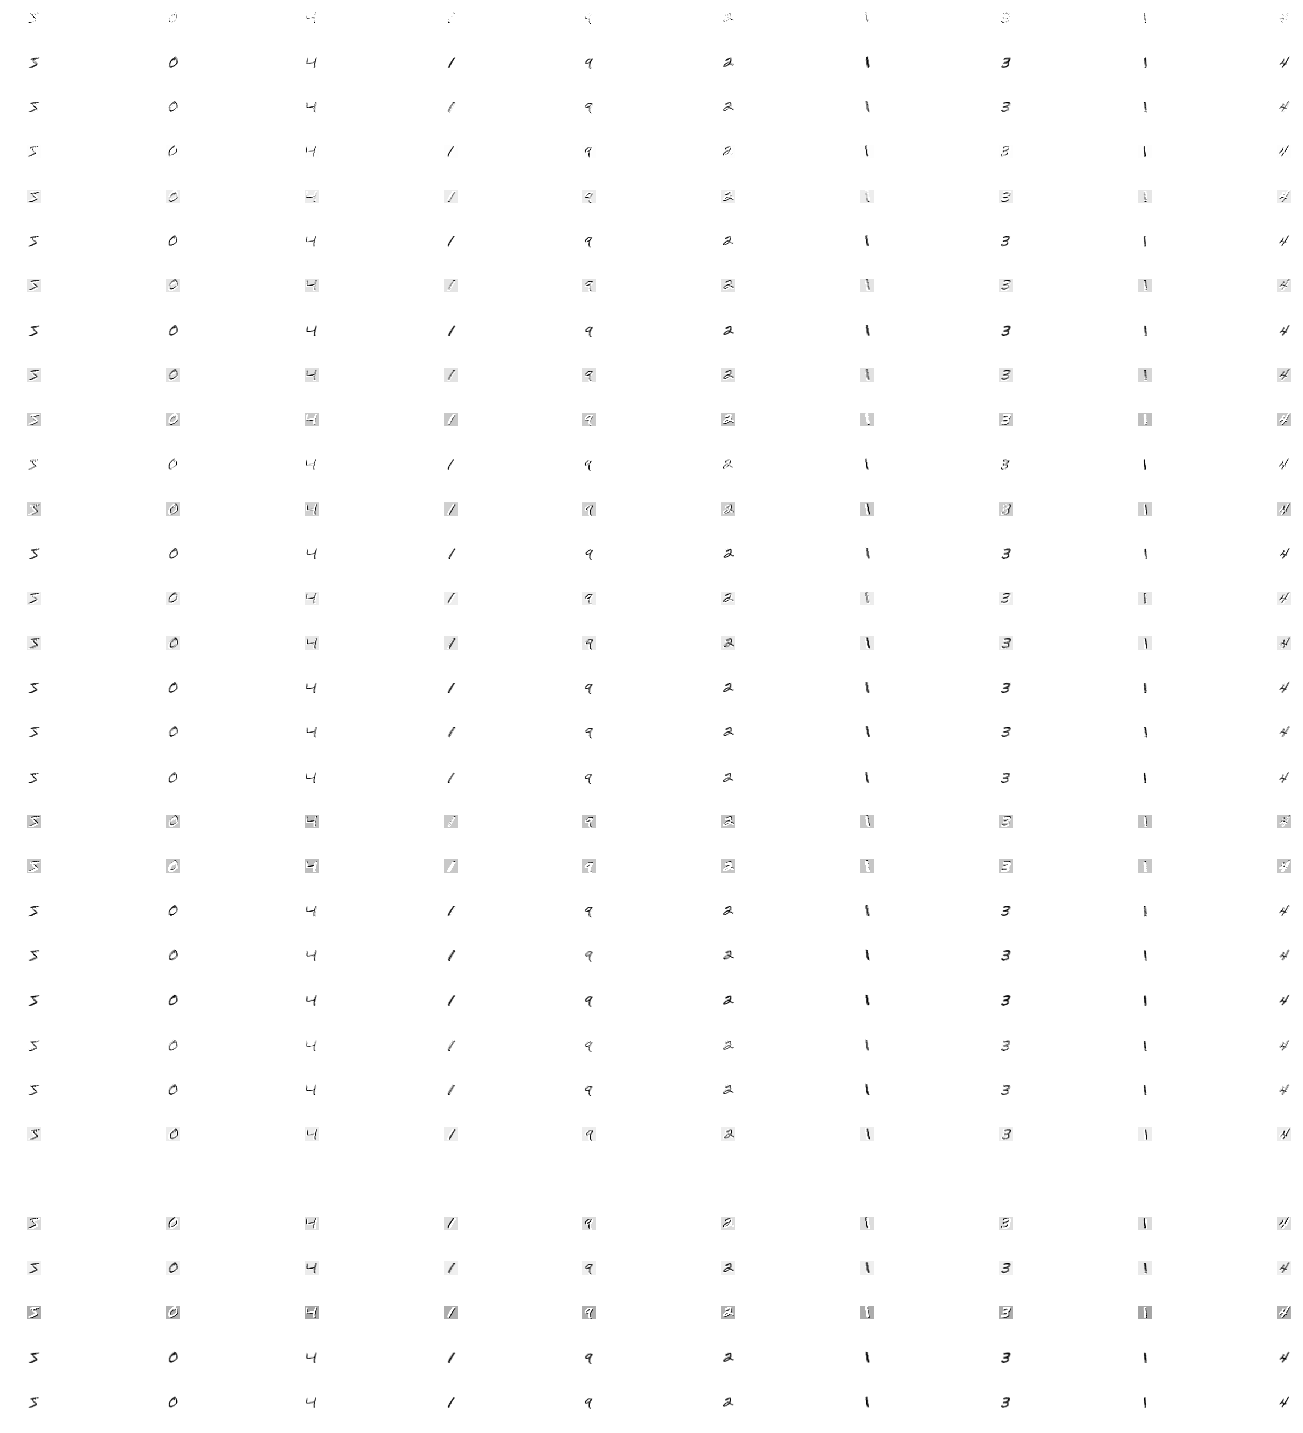

In [40]:
# visualization of First Layer with 32 filters
get_first_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))
print ('first layer shape: ', first_layer.shape)

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw(mat, nb_filters_01, show_size, pos)
plt.tight_layout()
plt.savefig("deep_cnn_first_layer_32_filters_images.png", dpi=300)
plt.show()

second layer shape:  (10, 64, 24, 24)


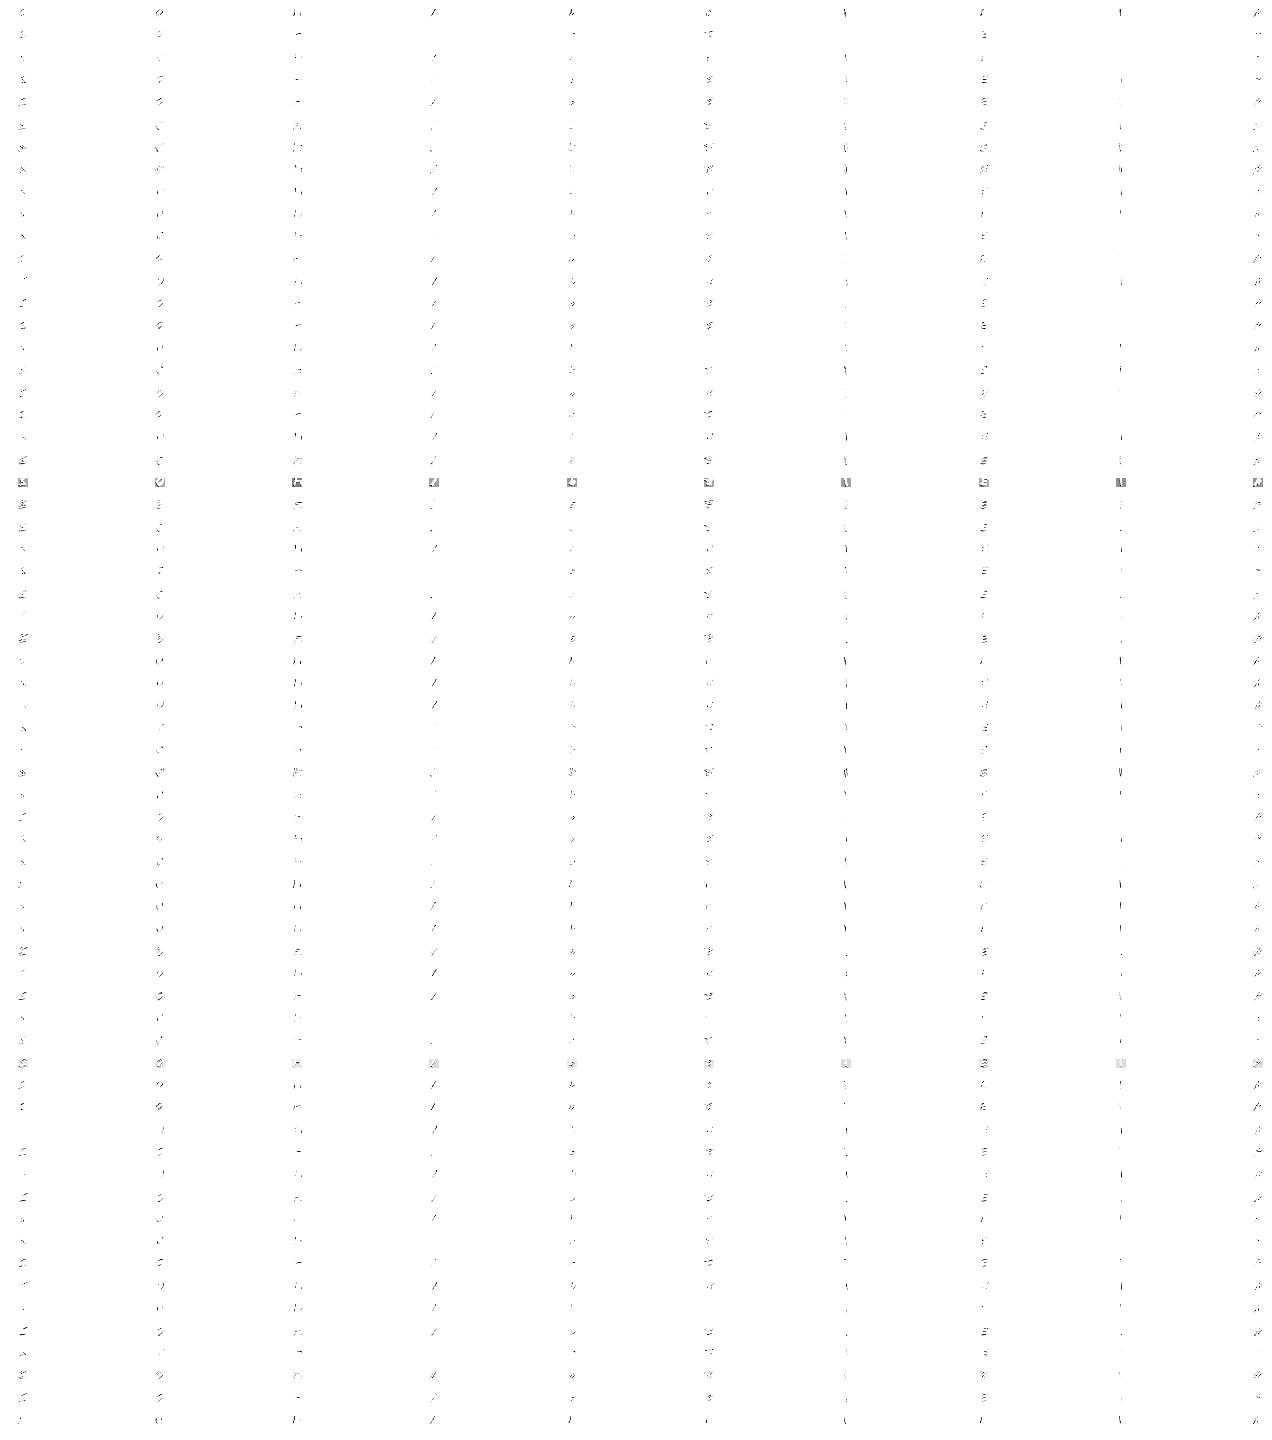

In [41]:
# visualization of second Layer with 64 filters
get_second_layer_output = K.function([model.layers[0].input], [model.layers[3].output])
second_layer = get_second_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))
print ('second layer shape: ', second_layer.shape)

for img_index, filters in enumerate(second_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw(mat, nb_filters_02, show_size, pos)
plt.tight_layout()   
plt.savefig("deep_cnn_second_layer_64_filters_images.png", dpi=300)
plt.show()

thrid layer shape:  (10, 64, 12, 12)


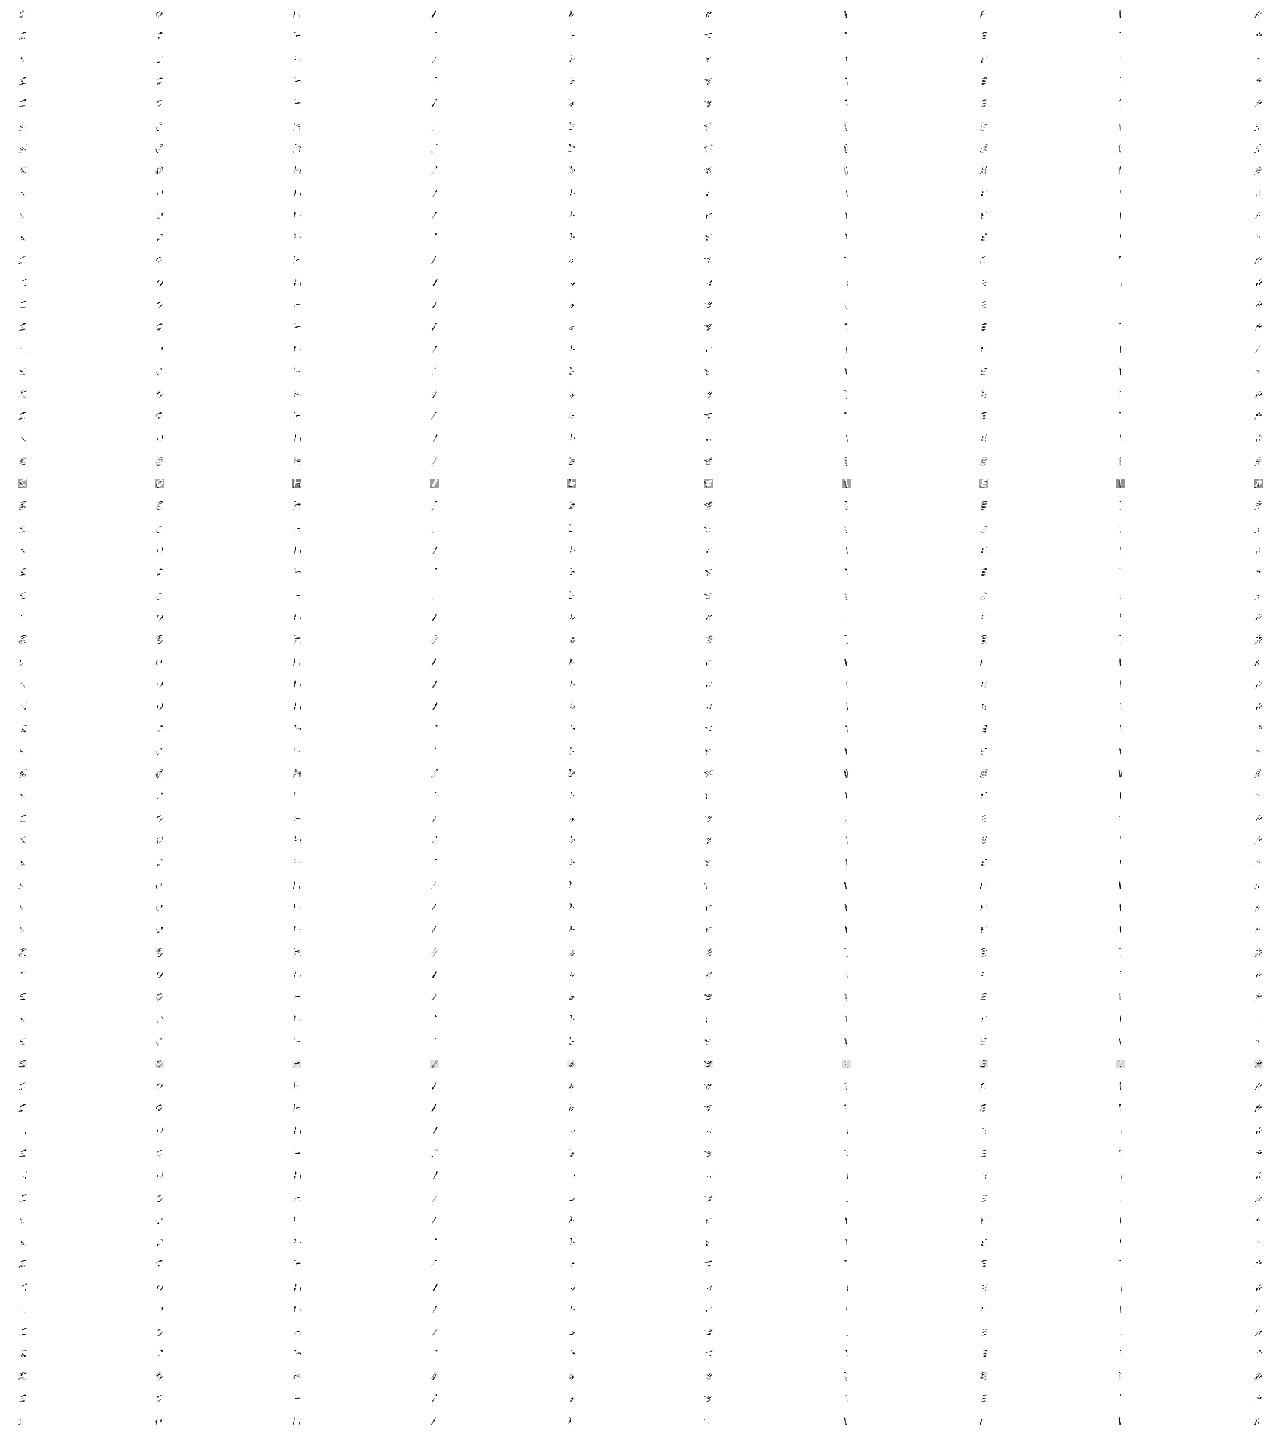

In [42]:
# visualization of third layer with 64 filters
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[4].output])
third_layers = get_3rd_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))
print ('thrid layer shape: ', third_layers.shape)

for img_index, filters in enumerate(third_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw(mat, nb_filters_02, show_size, pos)
plt.tight_layout()
plt.savefig("deep_cnn_third_layer_64_filters_images.png", dpi=300)
plt.show()